https://fastai1.fast.ai/troubleshoot.html

In [14]:
#import os
#os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
from fastai.data.all import *
from fastai.vision.all import *
from patchify import patchify

#torch.device("cpu")

#fastai.defaults.device = "cpu"
#defaults.device = "cpu"
#!export CUDA_VISIBLE_DEVICES=""

[https://walkwithfastai.com/Segmentation]

In [157]:
path = Path("../data/post-disaster/")
items = get_image_files(path/"images")
splitter = RandomSplitter()
split = splitter(items)
def label_func(o): return path/"targets"/f"{o.stem}_target{o.suffix}"

In [160]:
# https://discuss.pytorch.org/t/split-an-image-into-a-2-by-2-grid/189895

def extract_patches(x, grid_length=4):
    sz = x.shape[1] // grid_length
    row_length, col_length = (sz, sz)
    return (x
               .unfold(1,row_length,col_length)
               .unfold(2,row_length,col_length)
               .reshape(3,grid_length**2,row_length,col_length)
               .permute(1,0,2,3))
extract_patches(ten).shape

class SlicedImage()

torch.Size([16, 3, 256, 256])

In [161]:
tfms = [[PILImage.create, ToTensor(), extract_patches], [label_func, PILMask.create]]
dsets = Datasets(items, tfms, splits=split)
dls = dsets.dataloaders(bs=32)

AttributeError: 'PILImage' object has no attribute 'unfold'

In [103]:
 # show_image_batch(([patch for patch in patches]), items=16)
# visualize it later... for now include it in the pipeline

In [ ]:
class ExtractPatches(Transform):
    def __init__(self, extractor): self.extractor = extractor
    def encodes(self, o): return extractor(o)
    def decodes(self, x): return 
        

In [148]:
#tconv = ToTensor()
#pipe = Pipeline([PILImage.create, tconv, extract_patches])
#tst_im = pipe(fnames[13])
#tst_im.shape

In [18]:
def label_func(fn): return path/"targets"/f"{fn.stem}_target{fn.suffix}"

In [6]:
codes = ["Background", "NoDamage", "MinorDamage", "MajorDamage", "Destroyed"]

In [154]:
dblock = DataBlock(blocks = (ImageBlock, MaskBlock(codes=codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter = RandomSplitter(),
                   item_tfms = extract_patches
                  )
dblock.summary(path/"images")

Setting-up type transforms pipelines
Found 193 items
2 datasets of sizes 155,38
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> PILBase.create

Building one sample
  Pipeline: PILBase.create
    starting from
      ../data/post-disaster/images/mexico-earthquake_00000038_post_disaster.png
    applying PILBase.create gives
      PILImage mode=RGB size=1024x1024
  Pipeline: label_func -> PILBase.create
    starting from
      ../data/post-disaster/images/mexico-earthquake_00000038_post_disaster.png
    applying label_func gives
      ../data/post-disaster/targets/mexico-earthquake_00000038_post_disaster_target.png
    applying PILBase.create gives
      PILMask mode=L size=1024x1024

Final sample: (PILImage mode=RGB size=1024x1024, PILMask mode=L size=1024x1024)


Found 193 items
2 datasets of sizes 155,38
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> PILBase.create
Setting up after_item: Pipeline: AddMaskCodes -> extract_patches -> ToTensor

AttributeError: 'PILImage' object has no attribute 'unfold'

In [153]:
dls = dblock.dataloaders(path/"images")
dls.summary()

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


AttributeError: 'PILImage' object has no attribute 'unfold'

In [135]:
"""
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames = fnames,
    label_func = label_func,
    codes = codes,
    # item_tfms = Resize(1024)
)
#dls.vocab = codes
"""

'\ndls = SegmentationDataLoaders.from_label_func(\n    path,\n    bs=8,\n    fnames = fnames,\n    label_func = label_func,\n    codes = codes,\n    # item_tfms = Resize(1024)\n)\n#dls.vocab = codes\n'

In [8]:
# dls.c

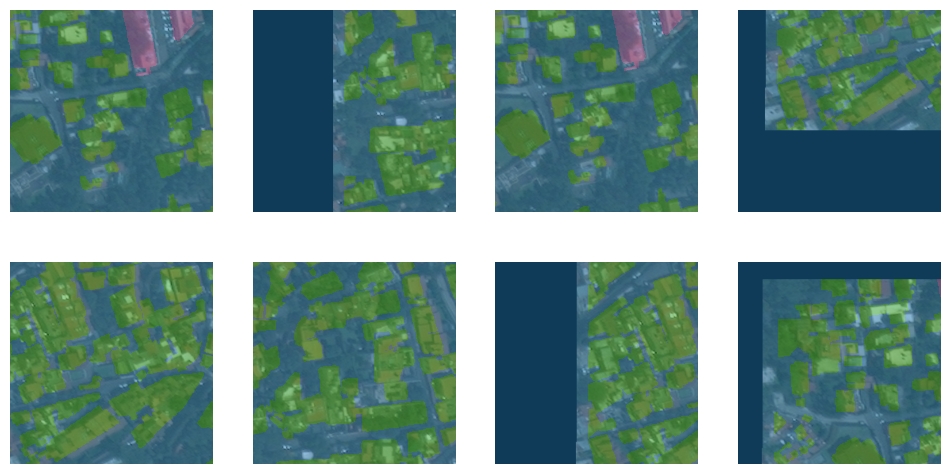

In [9]:
dls.show_batch(max_n=8)

In [10]:
learn = unet_learner(
    dls, 
    resnet18, 
    metrics=DiceMulti(axis=1), 
    self_attention=True, 
    act_cls=Mish,
    loss_func = DiceLoss(),
    pretrained=True
)
# learn.summary()

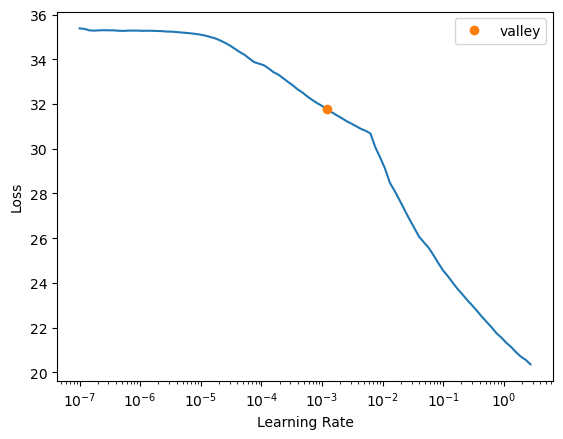

In [11]:
lr = learn.lr_find()

In [155]:
lr = lr[0]; lr
#https://towardsdatascience.com/implementing-a-batch-size-finder-in-fastai-how-to-get-a-4x-speedup-with-better-generalization-813d686f6bdf
# automatic batch finding??

TypeError: 'float' object is not subscriptable

In [13]:
# automatically does applies all of Leslie's tricks-- 1cycle, freezing, discrinatory lr
learn.fine_tune(epochs=10, base_lr=lr, freeze_epochs=2)

epoch,train_loss,valid_loss,dice_multi,time
0,1.657774,1.592957,0.638001,06:44
1,1.954933,1.770467,0.631060,06:41


epoch,train_loss,valid_loss,dice_multi,time


KeyboardInterrupt: 

In [ ]:
learn.show_results(max_n=8)